# Pre-amble

In [1]:
# loading the required packages
import pandas as pd
import numpy as np
import datetime
import random
import re
import os
import plotnine
from plotnine import *

# for repeated printouts 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# to custom displays of row-column df printouts
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Data import

Here, we'll load our analysis-ready sentencing data, and print out some of the basic information about the data:

In [2]:
# importing the intake and sentencing csv data, and focusing only on black or white defendants
intake_bw = pd.read_csv('../data/csv/intake_analysis.csv')
intake_bw = intake_bw[(intake_bw.is_black == True) | (intake_bw.is_white == True)].copy()

# now, we load the sentencing data
sentencing_bw = pd.read_csv('../data/csv/sentencing_analysis.csv')
sentencing_bw = sentencing_bw[(sentencing_bw.is_black == True) | (sentencing_bw.is_white == True)].copy()

C:\Users\Sean Hambali\AppData\Local\Temp\ipykernel_18740\2900819892.py:6: DtypeWarning: Columns (10,11,14,25) have mixed types. Specify dtype option on import or set low_memory=False.


# Summary Tables

In [3]:
# summarizing sex characteristics of each dataset
intake_sex_count = pd.DataFrame(intake_bw.is_female.value_counts())   # getting the count
intake_sex_count.columns = ['N']

intake_sex_prop = pd.DataFrame(intake_bw.is_female.value_counts(normalize=True)) # getting the proportion
intake_sex_prop.columns = ['Proportion']
intake_sex_prop['Proportion'] = intake_sex_prop['Proportion'].map('{:,.3f}'.format)

intake_sex = intake_sex_count.merge(intake_sex_prop, left_index=True, right_index = True) # combining both
columns = [('Intake', 'N'), ('Intake', 'Proportion')]    # creating a multilevel column to indicate different dfs
intake_sex.columns = pd.MultiIndex.from_tuples(columns)


# for the sentencing data
sentencing_bw['is_female_lgl'] = np.where(sentencing_bw.is_female == 1, True, False)
sentencing_sex_count = pd.DataFrame(sentencing_bw.is_female_lgl.value_counts())   # getting the count
sentencing_sex_count.columns = ['N']

sentencing_sex_prop = pd.DataFrame(sentencing_bw.is_female_lgl.value_counts(normalize=True)) # getting the proportion
sentencing_sex_prop.columns = ['Proportion']
sentencing_sex_prop['Proportion'] = sentencing_sex_prop['Proportion'].map('{:,.3f}'.format)

sentencing_sex = sentencing_sex_count.merge(sentencing_sex_prop, left_index=True, right_index = True) # combining both
columns = [('Sentencing', 'N'), ('Sentencing', 'Proportion')]    # creating a multilevel column to indicate different dfs
sentencing_sex.columns = pd.MultiIndex.from_tuples(columns)


# merging intake-sentencing
intake_sentencing_sex = intake_sex.merge(sentencing_sex, left_index=True, right_index=True)
intake_sentencing_sex['Characteristics'] = 'Sex'
intake_sentencing_sex['Level'] = np.where(intake_sentencing_sex.index == False, 'Male', 'Female')

# reordering the columns 
intake_sentencing_sex_cols = intake_sentencing_sex.columns.to_list()
intake_sentencing_sex_cols = intake_sentencing_sex_cols[-2:-1] + intake_sentencing_sex_cols[-1:] + intake_sentencing_sex_cols[:-2]
intake_sentencing_sex = intake_sentencing_sex[intake_sentencing_sex_cols]
intake_sentencing_sex

Characteristics   Level  Intake            Sentencing           
                                    N Proportion          N Proportion
False             Sex    Male  317431      0.860     130108      0.866
True              Sex  Female   51738      0.140      20137      0.134

In [4]:
# summarizing race characteristics of each dataset
intake_race_count = pd.DataFrame(intake_bw.is_black.value_counts())   # getting the count
intake_race_count.columns = ['N']

intake_race_prop = pd.DataFrame(intake_bw.is_black.value_counts(normalize=True)) # getting the proportion
intake_race_prop.columns = ['Proportion']
intake_race_prop['Proportion'] = intake_race_prop['Proportion'].map('{:,.3f}'.format)

intake_race = intake_race_count.merge(intake_race_prop, left_index=True, right_index = True) # combining both
columns = [('Intake', 'N'), ('Intake', 'Proportion')]    # creating a multilevel column to indicate different dfs
intake_race.columns = pd.MultiIndex.from_tuples(columns)


# for the sentencing data
sentencing_race_count = pd.DataFrame(sentencing_bw.is_black.value_counts())   # getting the count
sentencing_race_count.columns = ['N']

sentencing_race_prop = pd.DataFrame(sentencing_bw.is_black.value_counts(normalize=True)) # getting the proportion
sentencing_race_prop.columns = ['Proportion']
sentencing_race_prop['Proportion'] = sentencing_race_prop['Proportion'].map('{:,.3f}'.format)

sentencing_race = sentencing_race_count.merge(sentencing_race_prop, left_index=True, right_index = True) # combining both
columns = [('Sentencing', 'N'), ('Sentencing', 'Proportion')]    # creating a multilevel column to indicate different dfs
sentencing_race.columns = pd.MultiIndex.from_tuples(columns)


# merging intake-sentencing
intake_sentencing_race = intake_race.merge(sentencing_race, left_index=True, right_index=True)
intake_sentencing_race['Characteristics'] = 'Race'
intake_sentencing_race['Level'] = np.where(intake_sentencing_race.index == False, 'White', 'Black')

# reordering the columns 
intake_sentencing_race_cols = intake_sentencing_race.columns.to_list()
intake_sentencing_race_cols = intake_sentencing_race_cols[-2:-1] + intake_sentencing_race_cols[-1:] + intake_sentencing_race_cols[:-2]
intake_sentencing_race = intake_sentencing_race[intake_sentencing_race_cols]
intake_sentencing_race

Characteristics  Level  Intake            Sentencing           
                                   N Proportion          N Proportion
True             Race  Black  303727      0.822     122898      0.818
False            Race  White   65672      0.178      27347      0.182

In [5]:
# combining both datasets
intake_sentencing_racesex = pd.concat([intake_sentencing_sex, intake_sentencing_race])
intake_sentencing_racesex

# exporting to latex
intake_sentencing_racesex.to_latex('../output/textables/intake_sentencing_racesex.tex')

Characteristics   Level  Intake            Sentencing           
                                    N Proportion          N Proportion
False             Sex    Male  317431      0.860     130108      0.866
True              Sex  Female   51738      0.140      20137      0.134
True             Race   Black  303727      0.822     122898      0.818
False            Race   White   65672      0.178      27347      0.182

C:\Users\Sean Hambali\AppData\Local\Temp\ipykernel_18740\3220127340.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.


In [6]:
# summarizing the age distribution for both datasets
intake_age_summ = intake_bw.groupby(['is_black']).agg(Min = ('age_cleaned', min),
                                P25 = ('age_cleaned', lambda x: x.quantile(.25)), 
                                P50 = ('age_cleaned', lambda x: x.quantile(.5)), 
                                Mean = ('age_cleaned', "mean"),
                                P75 = ('age_cleaned', lambda x: x.quantile(.75)),
                                Max = ('age_cleaned', max))

cols = [('Intake', 'Min'), ('Intake', 'P25'), ('Intake', 'P50'), 
        ('Intake', 'Mean'), ('Intake', 'P75'), ('Intake', 'Max')]
intake_age_summ.columns = pd.MultiIndex.from_tuples(cols)

# for the sentencing data
sentencing_age_summ = sentencing_bw.groupby(['is_black']).agg(Min = ('age_cleaned', min),
                                        P25 = ('age_cleaned', lambda x: x.quantile(.25)), 
                                        P50 = ('age_cleaned', lambda x: x.quantile(.5)), 
                                        Mean = ('age_cleaned', "mean"),
                                        P75 = ('age_cleaned', lambda x: x.quantile(.75)),
                                        Max = ('age_cleaned', max))

cols = [('Sentencing', 'Min'), ('Sentencing', 'P25'), ('Sentencing', 'P50'), 
        ('Sentencing', 'Mean'), ('Sentencing', 'P75'), ('Sentencing', 'Max')]
sentencing_age_summ.columns = pd.MultiIndex.from_tuples(cols)

# combining both dfs 
age_summ = intake_age_summ.merge(sentencing_age_summ, left_index=True, right_index=True)

# formatting the numbers
age_summ[('Intake', 'Mean')] = age_summ[('Intake', 'Mean')].map('{:,.2f}'.format)
age_summ[('Sentencing', 'Mean')] = age_summ[('Sentencing', 'Mean')].map('{:,.2f}'.format)

age_summ

# exporting to latex
age_summ.to_latex('../output/textables/age_summ.tex')

Intake                                Sentencing                     \
            Min   P25   P50   Mean   P75   Max        Min   P25   P50   Mean   
is_black                                                                       
False      17.0  25.0  32.0  34.60  42.0  81.0       17.0  25.0  33.0  34.76   
True       17.0  23.0  31.0  34.09  44.0  81.0       17.0  22.0  29.0  32.71   

                      
           P75   Max  
is_black              
False     43.0  81.0  
True      42.0  81.0

C:\Users\Sean Hambali\AppData\Local\Temp\ipykernel_18740\1318803504.py:35: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.


In [7]:
# Outcome variables summary

# full sample intake summary
intake_summary = pd.DataFrame(intake_bw.agg({'fr_is_rejected':'mean'})).T

# full sample sentencing outcomes summary
sentencing_summary = pd.DataFrame(sentencing_bw.agg({'is_on_probation': 'mean', 'is_incarcerated': 'mean', 
                                                     'sentencing_term_y': 'mean'})).T

# merging the two data outcomes:
outcome_summary = intake_summary.merge(sentencing_summary, left_index=True, right_index=True)
outcome_summary['Race Group'] = 'Full'

# summarizing felonies rejected, by black-white
intake_bw_summary = intake_bw.groupby('is_black').agg({'fr_is_rejected': 'mean'})

# summarizing sentencing outcomes, by black-white
sentencing_bw_summary = sentencing_bw.groupby('is_black').agg({'is_on_probation': 'mean', 
                                                               'is_incarcerated': 'mean', 
                                                               'sentencing_term_y': 'mean'})

# merging the two data outcomes:
outcome_bw_summary = intake_bw_summary.merge(sentencing_bw_summary, left_index=True, right_index=True)
outcome_bw_summary['Race Group'] = np.where(outcome_bw_summary.index == False, 'White', 'Black')

# concatting the bw-full dataset
outcome_summary_df = pd.concat([outcome_summary, outcome_bw_summary]).reset_index(drop = True)

# ordering the columns 
outcome_summary_cols = outcome_summary_df.columns.to_list()
outcome_summary_cols = outcome_summary_cols[-1:] + outcome_summary_cols[:-1]
outcome_summary_df = outcome_summary_df[outcome_summary_cols]

# formatting the columns 
cols_to_format = ['fr_is_rejected', 'is_on_probation', 'is_incarcerated', 'sentencing_term_y']
for col in cols_to_format:
    outcome_summary_df[col] = outcome_summary_df[col].map('{:,.3f}'.format)
    
# Renaming the columns 
outcome_summary_df.columns = ['Race Group', '% rejected felonies', '% on probation', '% incarcerated', 'Sentencing term (years)']

outcome_summary_df

# exporting to latex
outcome_summary_df.to_latex('../output/textables/outcome_summary.tex')# Summary Tables


,Race Group,% rejected felonies,% on probation,% incarcerated,Sentencing term (years)
0,Full,0.066,0.388,0.538,3.058
1,White,0.069,0.517,0.388,2.616
2,Black,0.066,0.359,0.572,3.156


C:\Users\Sean Hambali\AppData\Local\Temp\ipykernel_18740\2871447482.py:45: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.


# Visualizing Trends

In [8]:
# by year, full-sample summary of outcome variables
intake_year_summary = intake_bw.groupby('felony_review_year').agg({'fr_is_rejected': 'mean'}).reset_index()
intake_year_summary = intake_year_summary[(intake_year_summary.felony_review_year > 2010) & 
                                          (intake_year_summary.felony_review_year <= 2022)].copy()

# sentencing summary
sentencing_year_summary = sentencing_bw.groupby('sentence_year').agg({'is_on_probation': 'mean', 
                                                                      'is_incarcerated': 'mean', 
                                                                      'sentencing_term_y': 'mean'}).reset_index()

sentencing_year_summary = sentencing_year_summary[(sentencing_year_summary.sentence_year > 2010) & 
                                                  (sentencing_year_summary.sentence_year <= 2022)].copy()

# merging the two datasets
full_year_summary = intake_year_summary.merge(sentencing_year_summary, left_on='felony_review_year', 
                                              right_on = 'sentence_year', how= 'inner')

# dropping excess year column
full_year_summary = full_year_summary.drop(columns=['felony_review_year'])
full_year_summary['Sample'] = 'Full'


# by year, by race summary of outcome variables
intake_year_race_summary = intake_bw.groupby(['is_black', 'felony_review_year']).agg({'fr_is_rejected': 'mean'}).reset_index()
intake_year_race_summary = intake_year_race_summary[(intake_year_race_summary.felony_review_year > 2010) & 
                                                    (intake_year_race_summary.felony_review_year <= 2022)].copy()

# sentencing summary
sentencing_year_race_summary = sentencing_bw.groupby(['is_black', 'sentence_year']).agg({'is_on_probation': 'mean', 
                                                                                         'is_incarcerated': 'mean', 
                                                                                         'sentencing_term_y': 'mean'}).reset_index()

sentencing_year_race_summary = sentencing_year_race_summary[(sentencing_year_race_summary.sentence_year > 2010) & 
                                                            (sentencing_year_race_summary.sentence_year <= 2022)].copy()

# merging the two datasets
full_year_race_summary = intake_year_race_summary.merge(sentencing_year_race_summary, 
                                                        left_on=['is_black', 'felony_review_year'], 
                                                        right_on = ['is_black', 'sentence_year'], 
                                                        how= 'inner')
# dropping excess year column
full_year_race_summary['Sample'] = np.where(full_year_race_summary.is_black == False, 'White', 'Black')
full_year_race_summary = full_year_race_summary.drop(columns=['is_black', 'felony_review_year'])


# combining the full sample and by race summaries
full_summary = pd.concat([full_year_summary, full_year_race_summary])

# reshaping the wide column into long to enable facetting in ggplot graph
full_summary_long = pd.melt(full_summary, id_vars = ['Sample', 'sentence_year'], 
                            value_vars=['fr_is_rejected', 'is_on_probation', 'is_incarcerated', 'sentencing_term_y'], 
                            var_name='outcome', value_name='value')

cond = [full_summary_long.outcome == 'fr_is_rejected', 
        full_summary_long.outcome == 'is_on_probation', 
        full_summary_long.outcome == 'is_incarcerated', 
        full_summary_long.outcome == 'sentencing_term_y']

desc = ['Prop. felonies rejected', 'Prop. on probation', 'Prop. incarcerated', 'Sentencing term (year)']

full_summary_long['outcome_facet'] = np.select(cond, desc)

# changing year column to factor
full_summary_long['sentence_year'] = full_summary_long['sentence_year'].astype('category')

# printing the summary df
full_summary_long

,Sample,sentence_year,outcome,value,outcome_facet
0,Full,2011,fr_is_rejected,0.117594,Prop. felonies rejected
1,Full,2012,fr_is_rejected,0.107961,Prop. felonies rejected
2,Full,2013,fr_is_rejected,0.075808,Prop. felonies rejected
3,Full,2014,fr_is_rejected,0.078566,Prop. felonies rejected
4,Full,2015,fr_is_rejected,0.081003,Prop. felonies rejected
...,...,...,...,...,...
139,Black,2018,sentencing_term_y,3.120853,Sentencing term (year)
140,Black,2019,sentencing_term_y,2.772678,Sentencing term (year)
141,Black,2020,sentencing_term_y,2.685182,Sentencing term (year)
142,Black,2021,sentencing_term_y,2.646216,Sentencing term (year)


C:\Users\Public\anaconda3\lib\site-packages\plotnine\facets\facet.py:440: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


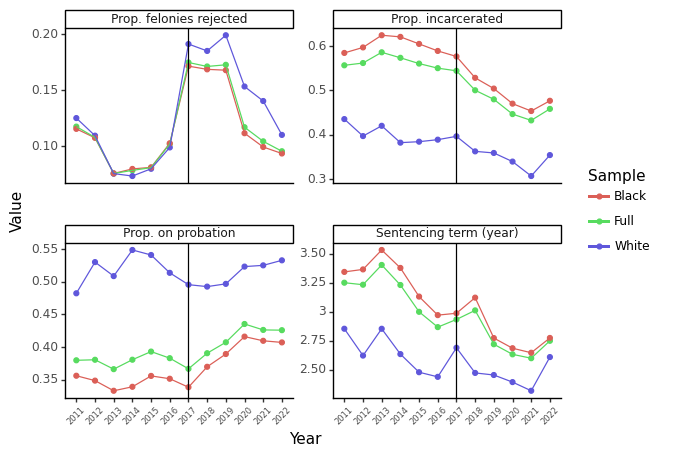

<ggplot: (82026767511)>

C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: ../graphs/full_year_summary_viz.png
C:\Users\Public\anaconda3\lib\site-packages\plotnine\facets\facet.py:440: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


In [9]:
# visualizing the outcome trend
full_year_summary_viz = (
    ggplot(full_summary_long, aes(x = 'sentence_year', y = 'value', color = 'Sample', group = 'Sample')) +
    geom_point() +
    geom_line() +
    geom_vline(aes(xintercept = 7)) +
    facet_wrap("outcome_facet", scales='free_y', nrow = 2) +
    labs(x = 'Year', y = 'Value') +
    theme_classic() +
    theme(axis_text_x = element_text(angle = 45, size = 6), 
          panel_spacing = .4)
)

# plotting the results 
full_year_summary_viz

# exporting 
full_year_summary_viz.save('../graphs/full_year_summary_viz.png', width = 5, height = 5, dpi = 125)